In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load dataset
df = pd.read_csv('CTMC_QMT.csv')
df.head()

,State,Start_Time,End_Time,Total_Cars
0,0,0,1,416
1,1,1,3,1061
2,0,3,7,1364
3,1,7,11,2396
4,2,11,13,2312


In [3]:
#MLE for the lambda parameters
def MLE_lambda_np(df):
    total_time = np.zeros(10)
    total_occurrences = np.zeros(10)

    for _, row in df.iterrows():
        state = row['State']
        time_in_state = row["End_Time"] - row["Start_Time"]
        total_time[state] += time_in_state
        total_occurrences[state] += 1

    lambda_parameters = total_occurrences / total_time
    return lambda_parameters

#MLE for the transition matrix
def MLE_transition_matrix_np(df):
    transition_matrix = np.zeros((10, 10))

    for index, row in df.iterrows():
        if index != len(df) - 1:
            start_state = row['State']
            end_state = df.iloc[index + 1]['State']
            transition_matrix[start_state, end_state] += 1

    for i in range(10):
        transition_matrix[i] /= np.sum(transition_matrix[i])

    return transition_matrix

[0.23744924 0.71395689 0.66784452 0.51603236 0.5298893  0.46168401
 0.57971014 0.8846399  0.74580759 0.84901758]
[[0.00000000e+00 3.57559269e-01 6.29226584e-01 1.28254955e-02
  0.00000000e+00 3.88651380e-04 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.15919085e-01 0.00000000e+00 2.09029610e-01 3.19554383e-02
  2.57988860e-02 1.64174729e-02 8.79507476e-04 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.60317460e-02 4.77248677e-01 0.00000000e+00 1.53862434e-01
  2.70899471e-02 2.01481481e-01 1.13650794e-01 6.34920635e-04
  0.00000000e+00 0.00000000e+00]
 [1.45180023e-03 6.32984901e-02 6.35598142e-01 0.00000000e+00
  2.62775842e-01 2.40998839e-02 1.13240418e-02 1.16144019e-03
  2.90360046e-04 0.00000000e+00]
 [0.00000000e+00 3.48189415e-03 4.34076137e-02 4.72609099e-01
  0.00000000e+00 4.23862581e-01 3.78365831e-02 1.43918292e-02
  3.94614670e-03 4.64252553e-04]
 [3.41530055e-04 3.41530055e-04 2.56147541e-03 8.53825137e-02
  4.48258197e-01 0.00000000e+00 3.000341

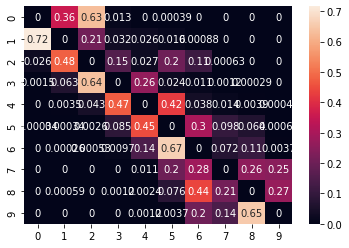

In [7]:
lambda_parameters = MLE_lambda_np(df)
print(lambda_parameters)

transition_matrix = MLE_transition_matrix_np(df)
print(transition_matrix)

#plot transition matrix
sns.heatmap(transition_matrix, annot=True)
plt.show()



In [22]:

#create Q matrix where Qij = lambda_i * Pij if i != j and Qii = -lambda_i
Q = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        if i != j:
            Q[i, j] = lambda_parameters[i] * transition_matrix[i, j]
        else:
            Q[i, j] = -lambda_parameters[i]


#calculate the stationary distribution of the CTMC where pi*Q = 0 and sum(pi) = 1, comment your code to explain your approach
def stationary_distribution(Q):
    Q = np.column_stack((Q, np.ones(len(Q))))
    b = np.zeros(len(Q) + 1)
    b[-1] = 1
    Q = Q.T
    print(Q.shape, b.shape)
    return np.linalg.solve(Q, b)

stationary_distribution(Q)

(11, 10) (11,)


LinAlgError: Last 2 dimensions of the array must be square